# Titanic Project


Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


Life cycle process of machine learning:

1.Define libraries(numpy,pandas, matplotlib etc), define the metrics for which model is getting optimized (metric is a library which assists me to find out the perfromance of the model here).

2.Analyzing our data

3.Data Description

4.Data cleansing and wrangling

5.Feature Engineering

6.Data pre-processing

7.Feature selection  (All 2,3,4 and 5 are the EDA process which we learnt in previous classes)

8.Split the data into training and test data sets.

9.Model selection

10.Model validation

11.Interpret the results


We will perform every step one by one 

# 1. Importing the libraries and reading the data of our dataframe.

here we are importing all the libraries which we require during our whole machine learning process and importing the dataset from github by first downloading it in our system and then reading it by using pandas dataframe

In [194]:
#for data wrangling
import pandas as pd
import numpy as np 

#for visulaizing our data using graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Removing warnings
import warnings
warnings.filterwarnings('ignore')

#importing model selection
from sklearn.model_selection import train_test_split

#importing all the machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#defining metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

#for saving our model
import joblib

In [99]:
#Loading the dataset
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.Analyzing our dataset

Here we are analyzing our dataset means checking what all columns we have in our dataset and the number of rows and columns

In [12]:
#getting first five rows of our dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#getting bottom 5 rows of our dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
#getting any random row
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C


In [15]:
#getting any three random row
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q


In [17]:
#checking the number of rows and columns in our dataset
df.shape

(891, 12)

Our dataset has 891 rows and 12 columns

# 3.Data Description

Here we are explaining what all the columns we have in our dataset and what do they mean


Survived: 0 = No, 1 = Yes

Passenger class: 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Gender of person

Age: Age in years	

Sibsp: siblings / spouses aboard the Titanic	

Parch: parents / children aboard the Titanic	

Ticket:	Ticket number	

Fare: Passenger fare	

Cabin: Cabin number	

Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# 4.Exploratory data analysis(EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


SOME OBSERVATIONS:

(i).describe() gives us statistics based on numerical columns only,
 
(ii)As count of age is only 714 while others have 891, it means 'Age' column has some missing values,

(iii)Max age is 80 years while the min age is 0.42(which is in fraction means the child is less than one year old or we can say that the child is only some months old),

(iv)Max fare is 512.329200, it should be in British pounds as the Titanic departs from Southhampton, England. 







## Performing some univariate, bivariate and multivariate analysis






Checking the counts of survivors

In [21]:
#univariate analysis
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

This tells us that 549 passengers did not survives which is indicated by the value 0 while 342 passengers survived which is indicated by value 1.

In [36]:
#bivariate analysis
#checking survival rate based on sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex'>

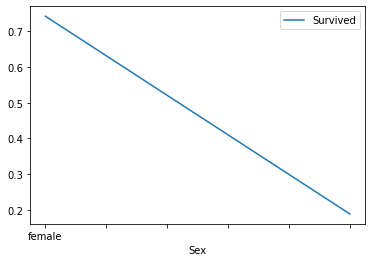

In [49]:
#checking survival rate visually
df.groupby('Sex')[['Survived']].mean().plot()

Observation: 74.20% females able to survive while only 18.89% males are able to survive

In [43]:
#multivariate analysis
#checking survival rate based on sex and class
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

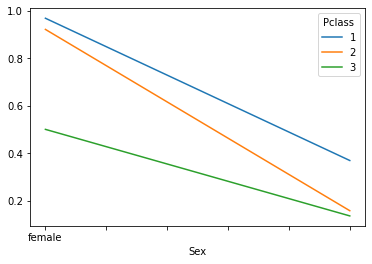

In [50]:
#checking survival rate based on sex and class visually
df.pivot_table('Survived', index='Sex', columns='Pclass').plot()

Observation: Out of all the Classes and sex together 96.80 is the highest survial rate which is of women from class 1 while the lowest survival rate is of male from class 3 which is only 13.54

In [54]:
#checking survival rate based on embarkment
df.pivot_table('Survived', columns='Embarked')

Embarked,C,Q,S
Survived,0.553571,0.38961,0.336957


<AxesSubplot:xlabel='Survived', ylabel='count'>

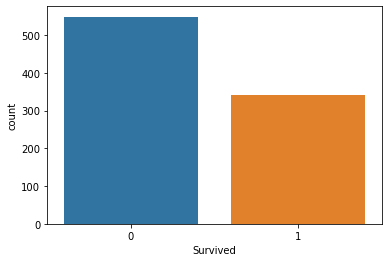

In [24]:
#plotting the number of survivors and died
sns.countplot(df['Survived'])


#through this we can se visually the number of people who survived and who does not survived

Now visualizing the survivors based on other columns as well like 'sex', 'Embarked', 'Pclass', 'Sibsp', 'Parch'

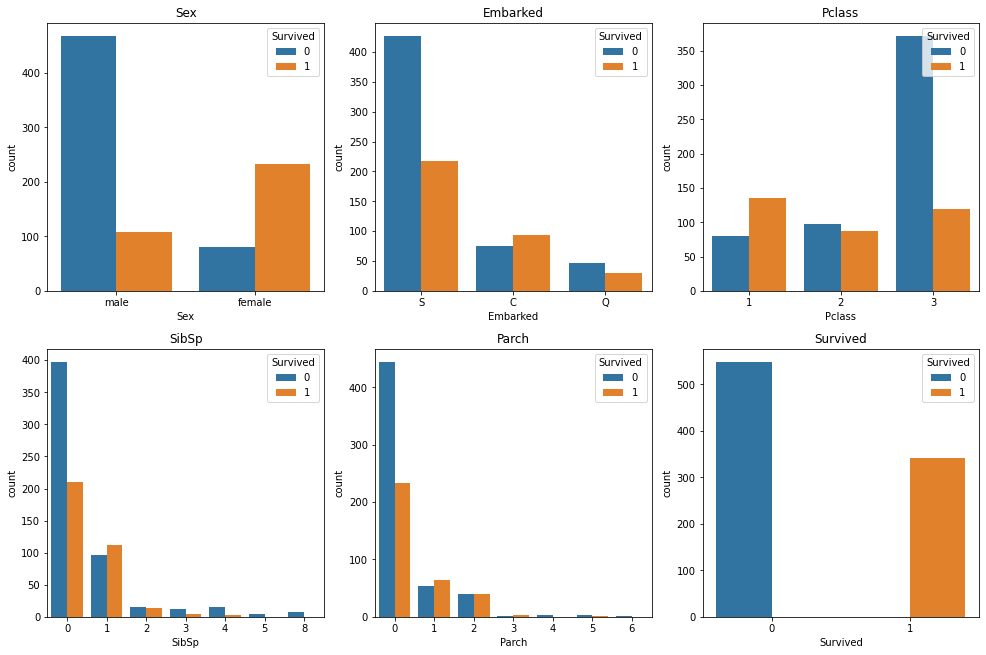

In [32]:
cols=['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch', 'Survived']
no_of_rows=2
no_of_columns=3

fig, axs=plt.subplots(no_of_rows, no_of_columns, figsize=(no_of_columns* 4.6, no_of_rows * 4.6))

for m in range(0, no_of_rows):
    for n in range(0, no_of_columns):
        i=m*no_of_columns + n
        ax=axs[m][n]
        sns.countplot(df[cols[i]], hue=df['Survived'], ax=ax)

        ax.set_title(cols[i])
        ax.legend(title='Survived', loc='upper right')
        
plt.tight_layout()
        
    

OBSERVATIONS:

1.By looking at the sex plot, we can say that most of the men died while women are most likely to survive,

2.By looking at the embarked plot, we can say that the people who are died are mostly boarded from Southhampton, while we talk about the probability location wise then the people who boarded from Cherbourg had the highest possibilty of surivival as the no of people who died is less than the no. of people who survived.

3.By looking at the Pclass plot, we can say that the people who are from Class 3 has survived the least, out of the total people who have died(549) more than 350 people are from class 3 while the people of class 1 has the highest probability of survival.

4.By looking at the SibSp plot, around 390 people who have came without any siblings or spouse have died,

5.By looking at the Parch plot, we can say that if a person does not have a parent or child with him on the titanic has the least possibility to survive,

6.And finally the Survived plot tells us that around 500+ people was not able to survive while around 300+ people was able to survive.

Plotting the prices paid for each class

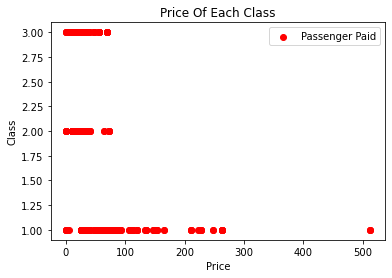

In [59]:
# Plot the Prices Paid Of Each Class
plt.scatter(df['Fare'], df['Pclass'],  color = 'red', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

# 5.Data Pre-processing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1.Drop and fill missing values

2.Data trasformation (log transformation)

3.Feature engineering

4.Feature encoding

Dropping and filling missing values

In [100]:
#checking is there any null values in our dataset
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To make the prediction best, we cannot let the columns of our dataset as null, so to remove the null values we can do two things:

1.Either we can drop the rows which have null values,

2.or we can fill the null values by average or median or mode of other values in that column

In this dataset we have to predict if an arbitrary passenger on Titanic would survive the sinking or not, so for that 'cabin','ticket','Name' and 'PassengerId' column would be of no use as it has to do nothing with survived or not

while we need 'AGE' to predict our data accurately, so we are replacing all the null values of 'AGE' column with the mean values of that column.

and for embarkment we just have 2 null values so we will fill it by the mode value of that column



In [116]:
#dropping cabin and ticket column
df1=df.drop(['Cabin','Ticket', 'Name', 'PassengerId'], axis=1)

In [117]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


all unrequired columns have been dropped

Replacing the null values in "AGE" column with the mean value

In [118]:
#checking the mean of Age column
df1['Age'].mean()

29.69911764705882

In [119]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

In [120]:
df1['Age'].isnull().sum()

0

No null values are present in the 'Age' column now

Checking null values for embarkment

In [121]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

filling the null values of embarked column with the mode

In [122]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

Running the isnull() command once more to check is there any null values left in our dataset

In [123]:
df1.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [124]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Since we are filled our dataset with values, now checking the datatype of our dataset columns, as to perform any model we need integer datatype values

In [125]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Look at the data types to see which columns need to be transformed/encoded to a number.Column sex and embarked are the only two columns that need to be transformed.



In [129]:
#printing unique values in sex and embarked column
print(df1['Sex'].unique())
print(df1['Embarked'].unique())



['male' 'female']
['S' 'C' 'Q']


In [135]:
#converting unique values of sex into numeric data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

#Encode sex column
df1.iloc[:,2]= le.fit_transform(df1.iloc[:,2].values)

#Encode embarked
df1.iloc[:,7]= le.fit_transform(df1.iloc[:,7].values)

#Print the NEW unique values in the columns
print(df1['Sex'].unique())
print(df1['Embarked'].unique())

[1 0]
[2 0 1]


Checking The skewness in our data

<AxesSubplot:>

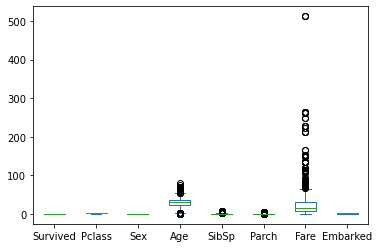

In [142]:
df1.plot.box()

In [143]:
#removing outliers by using zscore
#zscore is one of the library present inside scipy.statistics by which we can remove the outliers

from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445,0.585954
1,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845,1.942303
2,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854,0.585954
3,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730,0.585954
4,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.207709,0.474545,0.473674,0.386671,0.585954
887,1.266990,1.566107,1.355574,0.823344,0.474545,0.473674,0.044381,0.585954
888,0.789272,0.827377,1.355574,0.000000,0.432793,2.008933,0.176263,0.585954
889,1.266990,1.566107,0.737695,0.284663,0.474545,0.473674,0.044381,1.942303


In [144]:
#threshold for zscore values ---> above three are considered outliers
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


These are the places where outliers are present, it is in the form of rows and columns

In [155]:
df_new=df1[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [156]:
df1.shape

(891, 8)

In [158]:
df_new.shape

(820, 8)

81 rows are deleted after removing outliers

# 8.Splitting the data into Training and testing dataset

In [136]:
x=df1.iloc[:,1:8].values
y=df1.iloc[:,0].values

In [161]:
#splitting the data into training and testing 
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=45)

# 9. Model selection and model validation

In [166]:
#Using LogisticRegression

lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8171641791044776


In [169]:
#Confusion Matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[150  28]
 [ 21  69]]


In [172]:
#Using Support Vector
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

pred_y = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,pred_y))

Acc= 0.7014925373134329


In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,pred_y)
print(confusion_mat)
print(classification_report(y_test,pred_y))

[[159  19]
 [ 61  29]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       178
           1       0.60      0.32      0.42        90

    accuracy                           0.70       268
   macro avg       0.66      0.61      0.61       268
weighted avg       0.68      0.70      0.67       268



In [174]:
#Using KNN Neighbors
model1= KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train,y_train)
y_pred2 = model1.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7014925373134329


In [176]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred2)
print(confusion_mat)
print(classification_report(y_test,y_pred2))

[[139  39]
 [ 41  49]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       178
           1       0.56      0.54      0.55        90

    accuracy                           0.70       268
   macro avg       0.66      0.66      0.66       268
weighted avg       0.70      0.70      0.70       268



In [177]:
#Using GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.8097014925373134


In [178]:
confusion_mat = confusion_matrix(y_test,y_pred3)
print(confusion_mat)
print(classification_report(y_test,y_pred3))

[[147  31]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       178
           1       0.69      0.78      0.73        90

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.82      0.81      0.81       268



In [179]:
#Using Decision Tree
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.7873134328358209


In [180]:
confusion_mat = confusion_matrix(y_test,y_pred4)
print(confusion_mat)
print(classification_report(y_test,y_pred4))

[[141  37]
 [ 20  70]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       178
           1       0.65      0.78      0.71        90

    accuracy                           0.79       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268



In [182]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.81,0.70,0.80,0.70,0.78]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.81,Logistic Regression
0.80,Naive Bayes
0.78,Decision Tree
0.70,Support Vector Machines
0.70,KNN


 Logistic Regression has the best accuracy

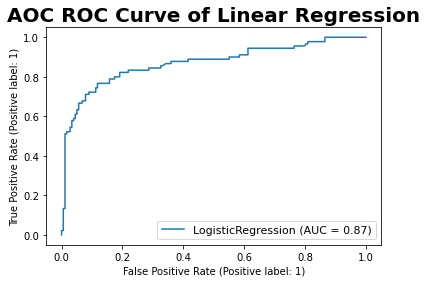

Auc Score :
 0.8046816479400749


In [186]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Linear Regression',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, lr.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)


## Saving model 

In [188]:
joblib.dump(lr,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

# Predicting the final model

In [191]:
# Prediction
prediction = lr.predict(x_test)

In [193]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(20)

,Predicted Values,Actual Values
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0
